# An example for Linear regression analysis
> 
> - **The data will be provided on the course website/cloud drive**
> - **You can redo the example together with another similar exercise after the class**


# **Part I**: Simple linear regression

## 1, Load some basic python/ML libraries

In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

## 2, load the data and plot them

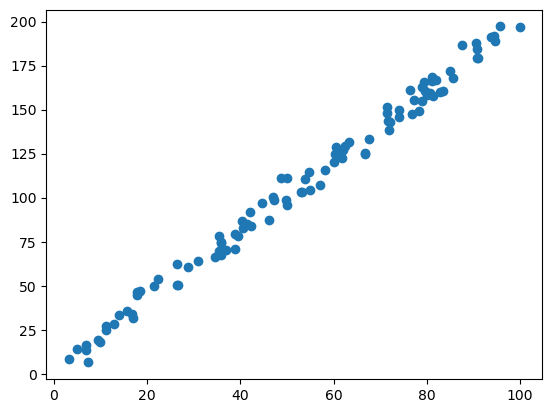

In [3]:
# load the data
X = []
Y = []
for line in open('data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)


# let's plot the data to see what it looks like
plt.scatter(X, Y)
plt.show()

## 3, Do the linear regression analysis 
>
>- 3.1, apply the equations we learned to calculate a and b
>- 3.2, you can load the ML library sklearn to use already developed regression functions


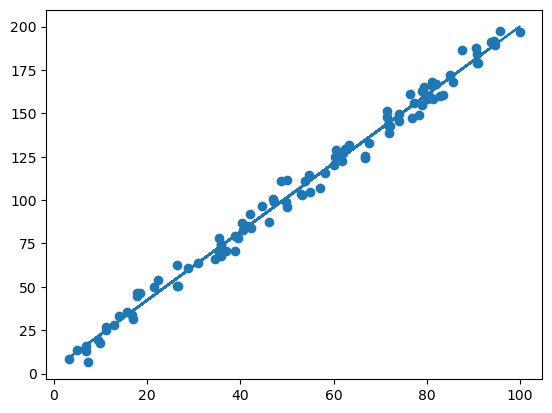

the r-squared is: 0.9911838202977805


In [5]:
# 3.1, use the provided regression formulas to estimate the coefficients for simple linear regression
# denominator is common
# note: this could be more efficient if
#       we only computed the sums and means once
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

# let's plot everything together to make sure it worked
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

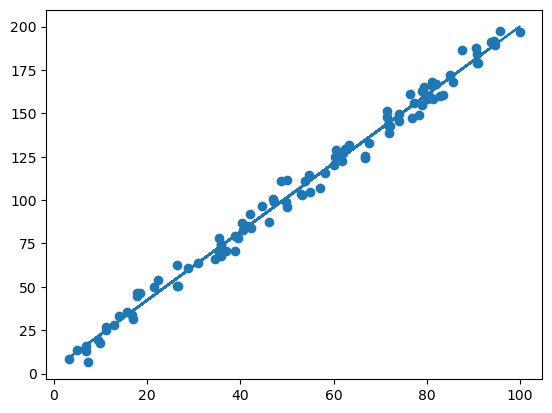

In [18]:
# 3.2, use the sklearn library for linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = np.expand_dims(X,1)

reg.fit(x, Y)
reg.score(x, Y)

# get to know the coefficients
a1 = reg.coef_
b1 = reg.intercept_

Yhat = a1 * X + b1

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# **Part II**: Here we can demonstrate if a fitting/regression is under/over-fitted

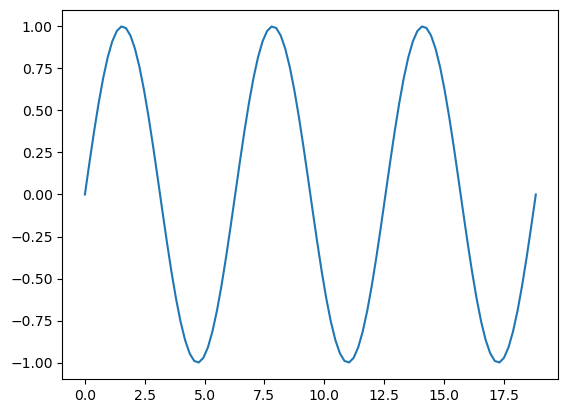

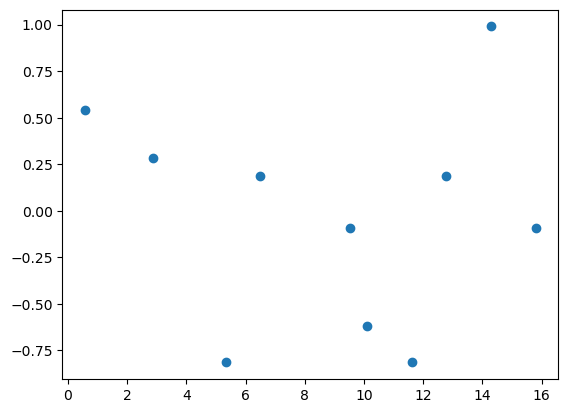

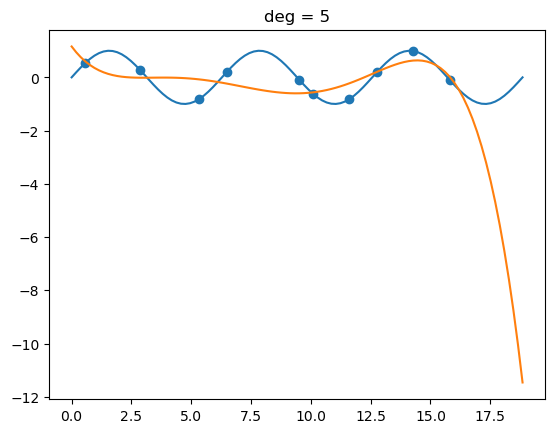

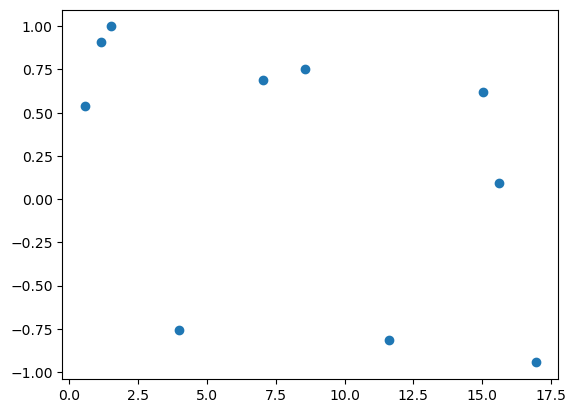

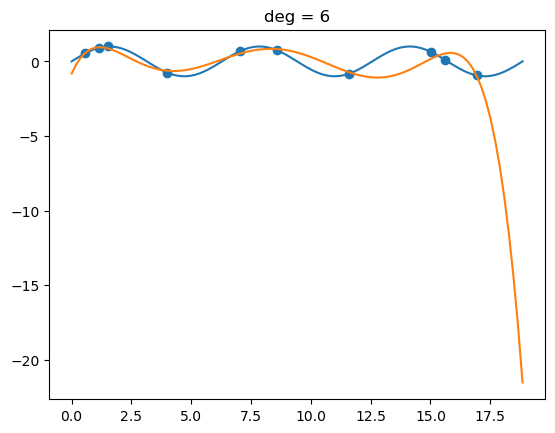

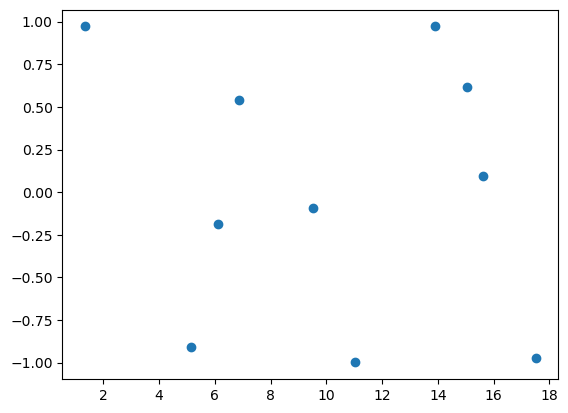

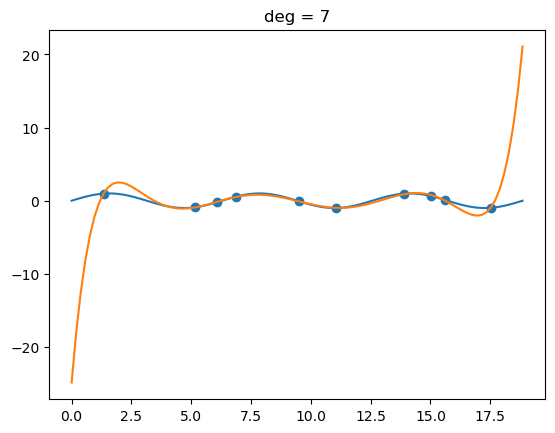

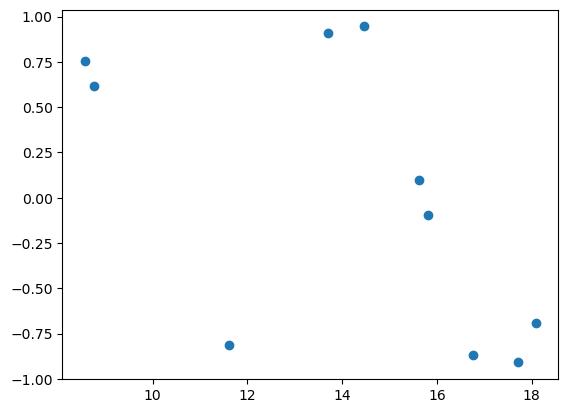

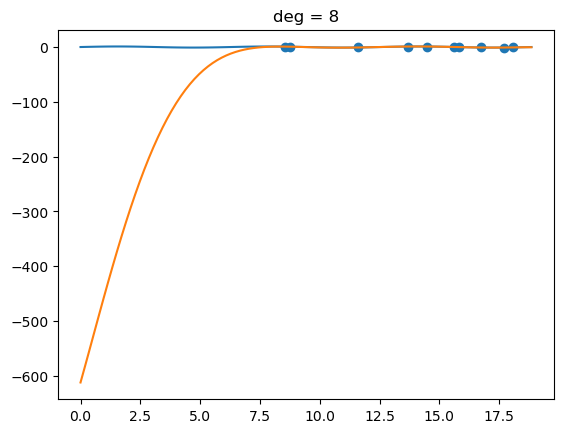

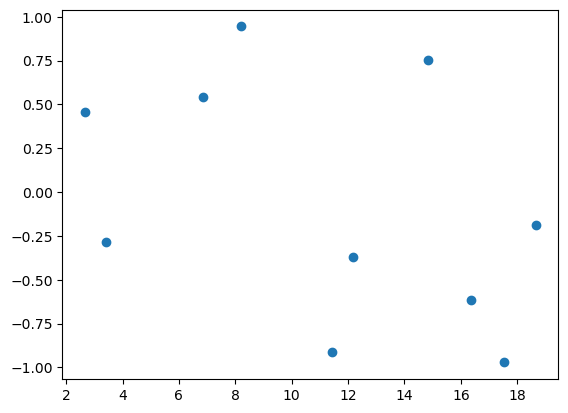

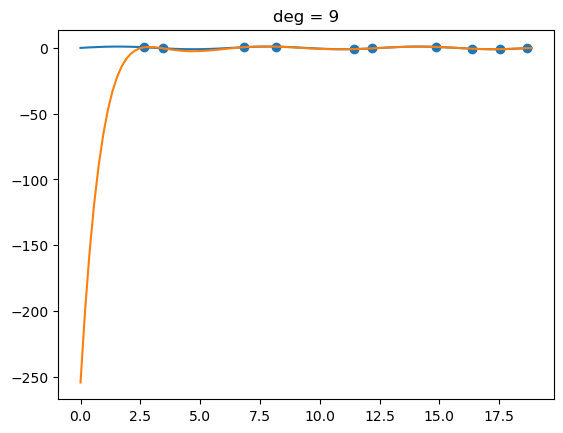

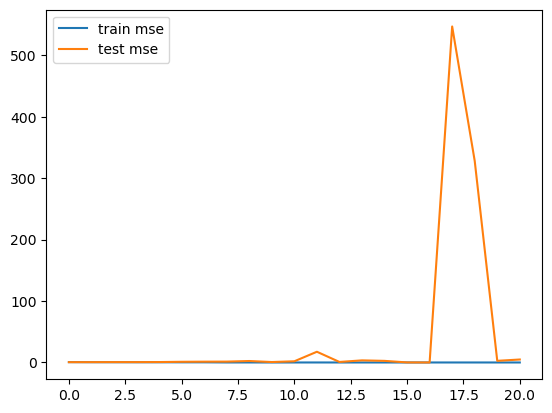

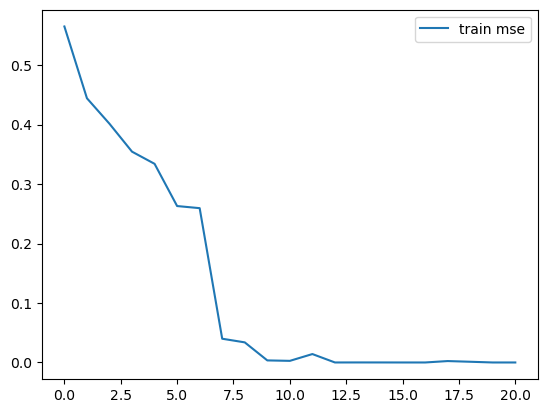

In [9]:
# notes for this course can be found at:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# https://www.udemy.com/data-science-linear-regression-in-python

from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt


def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T


def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))


def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()


def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)


def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # make up some data and plot it
    N = 100
    X = np.linspace(0, 6*np.pi, N)
    Y = np.sin(X)

    plt.plot(X, Y)
    plt.show()

    for deg in (5, 6, 7, 8, 9):
        fit_and_display(X, Y, 10, deg)
    plot_train_vs_test_curves(X, Y)